In [14]:
# Import libraries
import csv
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns
import warnings
import miscGeneralMethods
import seaborn as sns
import statistics

In [15]:
def setConstants():
    global REPLICATES
    global REPOSITORY
    global FILE_FITNESS
    global FILE_DESCRIPTORS
    global VARIABLE_1_PARAMETERS
    global VARIABLE_2_PARAMETERS
    global VARIABLE_1_NAME
    global VARIABLE_2_NAME
    global ROBOTS_NUMBER
    global FITNESS_TARGETS
    global EVALUATIONS
    global FITNESS_STARTING
#     REPOSITORY='/media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/'
    REPOSITORY='/home/edgar/are-logs/mnipes_experiments/'
#     REPLICATES = 2
#     REPLICATES = 6
    REPLICATES = 9
    FILE_FITNESS = 'fitnesses.csv'
    FILE_DESCRIPTORS = 'morph_descriptors.csv'
    VARIABLE_1_NAME = 'Evaluations'
    VARIABLE_2_NAME = 'Time'
    VARIABLE_1_PARAMETERS = ['exploration']
#     VARIABLE_1_PARAMETERS = ['corridor']
    VARIABLE_2_PARAMETERS = ['4']
#     FITNESS_TARGETS = [0.92]
#     FITNESS_STARTING = [0.51]
    FITNESS_TARGETS = [0.27]
    FITNESS_STARTING = [0.0468]
    ROBOTS_NUMBER = 180
    EVALUATIONS = 40000
    print('Repository: ' + REPOSITORY)
    print('Replicates: ' + str(REPLICATES))
    print('Descriptors: ' + str(FILE_DESCRIPTORS))
    print('File: ' + FILE_FITNESS)

In [16]:
def plot_scatter_all(repository_filepath, replicates_number, var1, var2_parameters, data_array, fitness_target, fitness_starting):
#     data_array = var2_fitness_collection
#     var2_parameters = [1]
#     fitness_target = 0.9
#     fitness_starting = 0.49
    print("Scatter...")
    fig = plt.figure(facecolor='white')
    plt.title(var1)
    plt.xlabel('Individual robots')
    plt.ylabel('Fitness')
    plt.ylim([0.0,1.0])

    for i in range(len(var2_parameters)):
        data_fitness = []
        for j in range(REPLICATES):
            temp_rep = []
            for k in range(ROBOTS_NUMBER):
                temp_rep.append(data_array[i][j][k,3])
            plt.scatter(range(0,ROBOTS_NUMBER,1),temp_rep)
    plt.legend(['0','1','2','3','4','5','6','7','8','9','10'],title='replicate')
    plt.plot([0,ROBOTS_NUMBER], [fitness_target, fitness_target], 'k', linewidth=2.0)
    plt.text(ROBOTS_NUMBER/2,fitness_target,'Target',ha='center',va='bottom')
    plt.plot([0,ROBOTS_NUMBER], [fitness_starting, fitness_starting], 'k', linewidth=2.0)
    plt.text(ROBOTS_NUMBER/2,fitness_starting,'Starting',ha='center',va='bottom')
    plt.savefig(REPOSITORY + var1 + 'scatter_all.png',dpi=200, bbox_inches='tight')
    plt.close(fig)

def plot_scatter_best(repository_filepath, replicates_number, var1, var2_parameters, data_array, fitness_target, fitness_starting):
    print("Scatter...")
    fig = plt.figure(facecolor='white')
    plt.title(var1)
    plt.xlabel('Individual robots')
    plt.ylabel('Fitness')
    plt.ylim([0.0,1.0])

    for i in range(len(var2_parameters)):
        data_fitness = []
        for j in range(ROBOTS_NUMBER):
            temp_rep = []
            for k in range(REPLICATES):
                temp_rep.append(data_array[i][k][j,3])
            max_fitness = max(temp_rep)
            data_fitness.append(max_fitness)
            #data_fitness.append(data_array[i][j][:ROBOTS_NUMBER,3])
    #     print(data_fitness)    
    plt.scatter(range(0,ROBOTS_NUMBER,1),data_fitness,c="k")
    plt.plot([0,ROBOTS_NUMBER], [fitness_target, fitness_target], 'k', linewidth=2.0)
    plt.text(ROBOTS_NUMBER/2,fitness_target,'Target',ha='center',va='bottom')
    plt.plot([0,ROBOTS_NUMBER], [fitness_starting, fitness_starting], 'k', linewidth=2.0)
    plt.text(ROBOTS_NUMBER/2,fitness_starting,'Starting',ha='center',va='bottom')
    plt.savefig(REPOSITORY + var1 + 'scatter_best.png',dpi=200, bbox_inches='tight')
    plt.close(fig)
def plot_fitness_eval_convergence(repository_filepath, replicates_number, var1, var2_parameters, data_array, fitness_target, fitness_starting):
    fig = plt.figure(facecolor='white')
    plt.title(var1)
    plt.xlabel('Evaluations')
    plt.ylabel('Fitness')
    plt.ylim([0.0,1.0])
    for i in range(len(var2_parameters)):
        temp_exp = []
        for j in range(REPLICATES):
            evaluations = 0
            temp_rep = []
            for k in range(len(data_array[i][j])):
                evaluations = evaluations + data_array[i][j][k,4]
                for robot_evaluations in range(int(data_array[i][j][k,4])):
                    temp_rep.append(data_array[i][j][k,3])
                if(evaluations > EVALUATIONS-1000): # Stop when budget reached
                    break
            temp_exp.append(temp_rep[0:EVALUATIONS-1000:400]) # Otherwise too slow
        array_mean = np.array([[float(y) for y in x] for x in temp_exp])
        df_fitness = pd.DataFrame(array_mean).melt()
        sns.lineplot(x="variable", y="value", data = df_fitness)

    TICKLABEL = range(0,EVALUATIONS-1000,8000)
    TICKPOS =  range(0,len(temp_exp[0]),20)
    plt.xticks(TICKPOS, [str(i) for i in TICKLABEL])
    plt.plot([0,len(temp_exp[0])], [fitness_target, fitness_target], 'k', linewidth=2.0)
    plt.text(len(temp_exp[0])/2,fitness_target,'Target',ha='center',va='bottom')
    plt.plot([0,len(temp_exp[0])], [fitness_starting, fitness_starting], 'k', linewidth=2.0)
    plt.text(len(temp_exp[0])/2,fitness_starting,'Starting',ha='center',va='bottom')
    plt.savefig(REPOSITORY + var1 + 'Evaluationsprogression.png',dpi=200, bbox_inches='tight')
    plt.close(fig)
    
def plot_fitness_convergence(repository_filepath, replicates_number, var1, var2_parameters, data_array, fitness_target, fitness_starting):
    
    fig = plt.figure(facecolor='white')
    plt.title(var1)
    plt.xlabel('Individual robots')
    plt.ylabel('Fitness')
    plt.ylim([0.0,1.0])
    
    for i in range(len(var2_parameters)):
        data_fitness = []
        for j in range(REPLICATES):
            temp_robot = []
            for k in range(ROBOTS_NUMBER):
                temp_robot.append(data_array[i][j][k,3])
            data_fitness.append(temp_robot)
            #data_fitness.append(data_array[i][j][:ROBOTS_NUMBER,3])
        array_mean = np.array([[float(y) for y in x] for x in data_fitness])
        df_fitness = pd.DataFrame(array_mean).melt()
        sns.lineplot(x="variable", y="value", data = df_fitness)
    plt.plot([0,ROBOTS_NUMBER], [fitness_target, fitness_target], 'k', linewidth=2.0)
    plt.text(ROBOTS_NUMBER/2,fitness_target,'Target',ha='center',va='bottom')
    plt.plot([0,ROBOTS_NUMBER], [fitness_starting, fitness_starting], 'k', linewidth=2.0)
    plt.text(ROBOTS_NUMBER/2,fitness_starting,'Starting',ha='center',va='bottom')
    plt.savefig(REPOSITORY + var1 + 'progression.png',dpi=200, bbox_inches='tight')
    plt.close(fig)
    
def plot_descriptors_convergence(repository_filepath, replicates_number, var1, var2_parameters, data_array):

    fig = plt.figure(facecolor='white')
    plt.title(var1)
    plt.xlabel('Robots')
    plt.ylabel('Organs number')
    
    for i in range(len(var2_parameters)):
        data_fitness = []
        for j in range(REPLICATES):
            temp_robot = []
            for k in range(ROBOTS_NUMBER):
                temp_robot.append(data_array[i][j][k,5])
            data_fitness.append(temp_robot)
            #data_fitness.append(data_array[i][j][:ROBOTS_NUMBER,5])
        array_mean = np.array([[float(y) for y in x] for x in data_fitness])
        df_fitness = pd.DataFrame(array_mean).melt()
        sns.lineplot(x="variable", y="value", data = df_fitness, label='Wheels')
        
        data_fitness = []
        for j in range(REPLICATES):
            temp_robot = []
            for k in range(ROBOTS_NUMBER):
                temp_robot.append(data_array[i][j][k,6])
            data_fitness.append(temp_robot)
            #data_fitness.append(data_array[i][j][:ROBOTS_NUMBER,6])
        array_mean = np.array([[float(y) for y in x] for x in data_fitness])
        df_fitness = pd.DataFrame(array_mean).melt()
        sns.lineplot(x="variable", y="value", data = df_fitness, label='Sensors')
        
        data_fitness = []
        for j in range(REPLICATES):
            temp_robot = []
            for k in range(ROBOTS_NUMBER):
                temp_robot.append(data_array[i][j][k,7]/2)
            data_fitness.append(temp_robot)
            #data_fitness.append(data_array[i][j][:ROBOTS_NUMBER,7])
        array_mean = np.array([[float(y) for y in x] for x in data_fitness])
        df_fitness = pd.DataFrame(array_mean).melt()
        sns.lineplot(x="variable", y="value", data = df_fitness, label='Legs')
        
        data_fitness = []
        for j in range(REPLICATES):
            temp_robot = []
            for k in range(ROBOTS_NUMBER):
                temp_robot.append(data_array[i][j][k,8])
            data_fitness.append(temp_robot)
            #data_fitness.append(data_array[i][j][:ROBOTS_NUMBER,8])
        array_mean = np.array([[float(y) for y in x] for x in data_fitness])
        df_fitness = pd.DataFrame(array_mean).melt()
        sns.lineplot(x="variable", y="value", data = df_fitness, label='Casters')
    
    TICKPOS =  np.arange(0,1.0-0.0625*3,0.0625)
    TICKLABEL = range(0,13,1)
    plt.yticks(TICKPOS, [str(i) for i in TICKLABEL])
    plt.ylim([0.0,0.4])
    
    plt.legend()
    
    plt.savefig(REPOSITORY + var1 + 'organs.png',dpi=200, bbox_inches='tight')
    plt.close(fig)
    
def plot_descriptors_scatter(repository_filepath, replicates_number, var1, var2_parameters, data_array):

    fig = plt.figure(facecolor='white')
    plt.title(var1)
    plt.xlabel('Robots')
    plt.ylabel('Organs number')
    plt.scatter(np.linspace(0,ROBOTS_NUMBER,ROBOTS_NUMBER),data_array[0][1][:ROBOTS_NUMBER,5])
    plt.scatter(np.linspace(0,ROBOTS_NUMBER,ROBOTS_NUMBER),data_array[0][1][:ROBOTS_NUMBER,6])
    plt.scatter(np.linspace(0,ROBOTS_NUMBER,ROBOTS_NUMBER),data_array[0][1][:ROBOTS_NUMBER,7])    
    
    TICKPOS =  np.arange(0,1.0,0.0625)
    TICKLABEL = range(0,16,1)
    plt.yticks(TICKPOS, [str(i) for i in TICKLABEL])
    plt.ylim([0.0,0.6])
    
    plt.legend(['Wheels', ' Sensors', ' Legs'])
    
    plt.savefig(REPOSITORY + var1 + 'scatter.png',dpi=200, bbox_inches='tight')
    plt.close(fig)    
    
def plot_swarm_rep(repository_filepath, replicates_number, var1,data_fitness, data_descriptors, organType, fitness_target, fitness_starting):
    print("Plotting Swarm...")
    if(organType == 1):
        label = "wheels"
        column = 5
    if(organType == 2):
        label = "sensors"
        column = 6
    if(organType == 3):
        label = "legs"
        column = 7
    if(organType == 4):
        label = "casters"
        column = 8
    list_descriptors = []
    list_fitness = []
    for i in range(replicates_number):
        list_fitness.extend(data_fitness[0][i][:ROBOTS_NUMBER,3])
        list_descriptors.extend(data_descriptors[0][i][:ROBOTS_NUMBER,column])
    fig = plt.figure(facecolor='white')
    plt.title(var1+'-'+label)
    sns.boxplot(x=list_descriptors, y=list_fitness, whis=np.inf,width=0.95)
#     sns.swarmplot(x=data_descriptors[0][0][:ROBOTS_NUMBER,column],y=data_fitness[0][0][:ROBOTS_NUMBER,3],size=4.0,color="black", edgecolor="black")
    plt.xlabel(label)
    plt.ylabel('Fitness')
    plt.ylim([0.0,1.0])
    TICKPOS =  range(8+1)
    TICKLABEL = range(8+1)
    plt.xticks(TICKPOS, [str(i) for i in TICKLABEL])
    plt.plot([0,8], [fitness_starting, fitness_starting], 'k', linewidth=2.0)
    plt.text(8/2,fitness_starting,'Starting',ha='center',va='bottom')
    plt.plot([0,8], [fitness_target, fitness_target], 'k', linewidth=2.0)
    plt.text(8/2,fitness_target,'Target',ha='center',va='bottom')
    plt.savefig(REPOSITORY + var1 + label + 'swarmPlot.png',dpi=200, bbox_inches='tight')
    plt.close(fig)
    
def plot_heatmaps(repository_filepath, replicates_number, var1, data_fitness, data_descriptors):
    print("Plotting heatmaps...")
    
    # Plot the max value for each combination of organs
    organ_comb = [[5,6],[5,7],[5,8],[8,7]]
    organ_labels = [['wheels','sensors'],['wheels','legs'],['wheels','casters'],['casters','legs']]
    for organ in range(len(organ_comb)):        
        fig = plt.figure(facecolor='white')
        organ_2d_comb = np.zeros((9,9))
        plt.title(var1 + ' - max')
        for i in range(replicates_number):
            for j in range(ROBOTS_NUMBER):
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16)
                    if(organ_comb[organ][1] == 7):
                        y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16 / 2)
                    else:
                        y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16)
                        
                    if(var2_fitness_collection[0][i][j,3] > organ_2d_comb[x,y]):
                        organ_2d_comb[x,y] = round(var2_fitness_collection[0][i][j,3],2)
        
        sns.set(font_scale = 1.0)
        ax = sns.heatmap(organ_2d_comb, linewidth=0.5, annot=True,cbar_kws={'label': 'max fitness'})
        ax.set_xlabel(organ_labels[organ][1])
        ax.set_ylabel(organ_labels[organ][0])
        plt.savefig(REPOSITORY + var1 + organ_labels[organ][1] + organ_labels[organ][0] + 'heatmapmaxallrep.png',dpi=200, bbox_inches='tight')
        plt.close(fig)
        
    # Plot heatmap for each replicate
    organ_comb = [[5,6],[5,7],[5,8],[8,7]]
    organ_labels = [['wheels','sensors'],['wheels','legs'],['wheels','casters'],['casters','legs']]
    for organ in range(len(organ_comb)):
        for i in range(replicates_number):
            
            fig = plt.figure(facecolor='white')
            organ_2d_comb = np.zeros((9,9))
            plt.title(var1 + ' - ' + str(i) +  ' - max')
            
            for j in range(ROBOTS_NUMBER):
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16)
                    if(organ_comb[organ][1] == 7):
                        y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16 / 2)
                    else:
                        y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16)
                        
                    if(var2_fitness_collection[0][i][j,3] > organ_2d_comb[x,y]):
                        organ_2d_comb[x,y] = round(var2_fitness_collection[0][i][j,3],2)
        
            sns.set(font_scale = 1.0)
            ax = sns.heatmap(organ_2d_comb, linewidth=0.5, annot=True,cbar_kws={'label': 'max fitness'})
            ax.set_xlabel(organ_labels[organ][1])
            ax.set_ylabel(organ_labels[organ][0])
            plt.savefig(REPOSITORY + var1 + organ_labels[organ][1] + organ_labels[organ][0] + str(i) +'heatmapmax.png',dpi=200, bbox_inches='tight')
            plt.close(fig)
            
    # Plot the mean value for each combination of organs
    organ_comb = [[5,6],[5,7],[5,8],[8,7]]
    organ_labels = [['wheels','sensors'],['wheels','legs'],['wheels','casters'],['casters','legs']]
    for organ in range(len(organ_comb)):
        fig = plt.figure(facecolor='white')
#         organ_2d_comb = np.zeros((9,9))
        plt.title(var1 + ' - mean')
        organ_2d_comb_list = []
        for i in range(replicates_number):
            organ_2d_comb_rep = np.zeros((9,9))
            for j in range(ROBOTS_NUMBER):
                    x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16)
                    if(organ_comb[organ][1] == 7):
                        y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16 / 2)
                    else:
                        y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16)
                        
                    if(var2_fitness_collection[0][i][j,3] > organ_2d_comb_rep[x,y]):
                        organ_2d_comb_rep[x,y] = round(var2_fitness_collection[0][i][j,3],2)
            organ_2d_comb_list.append(organ_2d_comb_rep)
    
        organ_2d_comb = np.mean( np.array(organ_2d_comb_list), axis=0 )
#         print(organ_2d_comb)
        sns.set(font_scale = 1.0)
        ax = sns.heatmap(organ_2d_comb, linewidth=0.5, annot=True,cbar_kws={'label': 'max fitness'})
        ax.set_xlabel(organ_labels[organ][1])
        ax.set_ylabel(organ_labels[organ][0])
        plt.savefig(REPOSITORY + var1 + organ_labels[organ][1] + organ_labels[organ][0] + 'heatmapmeanallrep.png',dpi=200, bbox_inches='tight')
        plt.close(fig)
        
def plot_trajectories(repository_filepath, replicates_number, var1, robots_number, folders):
    # Fitness file
    trajectories = []
    for i in range(robots_number):
        file_name = 'traj_' + str(i) + '_0'
        list_fitness = miscGeneralMethods.getDataFromFiles(folders, file_name, 0, 0)
        trajectories.append(list_fitness)
    for rep in range(replicates_number):
        fig = plt.figure(facecolor='white')
        plt.title('Trajectories - ' + str(rep))
        plt.xlabel('x (m)')
        plt.ylabel('y (m)')
        plt.ylim([-1.0,1.0])
        plt.xlim([-1.0,1.0])
        alpha_values=np.linspace(0,1,robots_number)
        for robot in range(robots_number):
            list_x = []
            list_y = []
            for waypoint in range(len(trajectories[robot][rep])):
                list_x.append(float(trajectories[robot][rep][waypoint][0]))
                list_y.append(float(trajectories[robot][rep][waypoint][1]))
            plt.plot(list_x,list_y,color='k',alpha=alpha_values[robot])
#         plt.plot([0.55,0.55], [-0.25, 0.25], 'k', linewidth=2.0)
#         plt.plot([-0.625,-0.625], [-0.3, 0.3], 'k', linewidth=2.0)
        plt.savefig(REPOSITORY + var1 + str(rep) + 'trajectories.png',dpi=200, bbox_inches='tight')
        plt.close(fig)
        

In [17]:
setConstants()

font = {'weight' : 'normal',
                    'size'   : 14.0}
plt.rc('font', **font)

Repository: /home/edgar/are-logs/mnipes_experiments/
Replicates: 9
Descriptors: morph_descriptors.csv
File: fitnesses.csv


In [18]:
print(REPOSITORY)
var1_fitness_collection = []
var1_morph_descriptors_collection = []
for var1 in VARIABLE_1_PARAMETERS:
    var2_fitness_collection = []
    var2_morph_descriptors_collection = []
    print('\t',var1,'-')
    for var2 in VARIABLE_2_PARAMETERS:
        print('\t\t',var2,'-')
        folders,folderNames = miscGeneralMethods.getDirectories(REPOSITORY + var1 + '/' + var2)
        # Fitness file
        list_fitness = miscGeneralMethods.getDataFromFiles(folders, FILE_FITNESS, 0, 0)
        array_fitness = miscGeneralMethods.transformDataToArray(list_fitness, REPLICATES)
        var2_fitness_collection.append(array_fitness)
        # Morph descriptors file
        list_morph_descriptors = miscGeneralMethods.getDataFromFiles(folders, FILE_DESCRIPTORS, 0, 1)
        array_morph_descriptors = miscGeneralMethods.transformDataToArray(list_morph_descriptors, REPLICATES)
        var2_morph_descriptors_collection.append(array_morph_descriptors)
        
    plot_fitness_convergence(REPOSITORY, REPLICATES, var1, VARIABLE_2_PARAMETERS, var2_fitness_collection, FITNESS_TARGETS[0], FITNESS_STARTING[0])
    plot_fitness_eval_convergence(REPOSITORY, REPLICATES, var1, VARIABLE_2_PARAMETERS, var2_fitness_collection, FITNESS_TARGETS[0], FITNESS_STARTING[0])
    plot_scatter_best(REPOSITORY, REPLICATES, var1, VARIABLE_2_PARAMETERS, var2_fitness_collection, FITNESS_TARGETS[0], FITNESS_STARTING[0])
    plot_scatter_all(REPOSITORY, REPLICATES, var1, VARIABLE_2_PARAMETERS, var2_fitness_collection, FITNESS_TARGETS[0], FITNESS_STARTING[0])
    plot_descriptors_convergence(REPOSITORY, REPLICATES, var1, VARIABLE_2_PARAMETERS, var2_morph_descriptors_collection)
    plot_descriptors_scatter(REPOSITORY, REPLICATES, var1, VARIABLE_2_PARAMETERS, var2_morph_descriptors_collection)
    plot_swarm_rep(REPOSITORY, REPLICATES, var1, var2_fitness_collection, var2_morph_descriptors_collection, 1, FITNESS_TARGETS[0], FITNESS_STARTING[0])
    plot_swarm_rep(REPOSITORY, REPLICATES, var1, var2_fitness_collection, var2_morph_descriptors_collection, 2, FITNESS_TARGETS[0], FITNESS_STARTING[0])
    plot_swarm_rep(REPOSITORY, REPLICATES, var1, var2_fitness_collection, var2_morph_descriptors_collection, 3, FITNESS_TARGETS[0], FITNESS_STARTING[0])
    plot_swarm_rep(REPOSITORY, REPLICATES, var1, var2_fitness_collection, var2_morph_descriptors_collection, 4, FITNESS_TARGETS[0], FITNESS_STARTING[0])
    plot_heatmaps(REPOSITORY,REPLICATES,var1,var2_fitness_collection,var2_morph_descriptors_collection)
    plot_trajectories(REPOSITORY,REPLICATES,var1,ROBOTS_NUMBER,folders)
    var1_fitness_collection.append(var2_fitness_collection)
    var1_morph_descriptors_collection.append(var2_morph_descriptors_collection)

/home/edgar/are-logs/mnipes_experiments/
	 exploration -
		 4 -
Getting directories...
--- Folders:  9
Getting data from files...
Transform data to array...
Getting data from files...
Transform data to array...
Scatter...
Scatter...
Plotting Swarm...
Plotting Swarm...
Plotting Swarm...
Plotting Swarm...
Plotting heatmaps...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
File not exist: /home/edgar/are-logs/mnipes_experiments/exploration/4/mnipes2_18_6_10-0-39-9331-1478960096/traj_5_0
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
File not exist: /home/edgar/are-logs/mnipes_experiments/exploration/4/mnipes2_17_6_9-50-40-484-3088

Getting data from files...
Getting data from files...
Getting data from files...
File not exist: /home/edgar/are-logs/mnipes_experiments/exploration/4/mnipes2_18_6_10-0-39-9331-1478960096/traj_153_0
Getting data from files...
File not exist: /home/edgar/are-logs/mnipes_experiments/exploration/4/mnipes2_16_6_10-22-36-6887-3602145218/traj_154_0
Getting data from files...
File not exist: /home/edgar/are-logs/mnipes_experiments/exploration/4/mnipes2_16_6_10-22-36-6887-3602145218/traj_155_0
Getting data from files...
Getting data from files...
File not exist: /home/edgar/are-logs/mnipes_experiments/exploration/4/mnipes2_16_6_10-22-36-6872-3516948282/traj_157_0
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
File not exist: /home/edgar/are-logs/mnipes_experiments/exploration/4/mnipes2_18_6_10-0-39-93

In [30]:
print("Get hall of fame...")
# Plot the max value for each combination of organs
organ_comb = [[5,6,7,8]]
organ_labels = [['wheels','sensors','legs','casters']]
best_different_robots = []
for organ in range(len(organ_comb)):   
    organs_2d_fitness = np.zeros((9,9,9,9))
    organs_2d_id = np.zeros((9,9,9,9))
    organs_2d_id = organs_2d_id - 1
    organs_2d_rep = np.zeros((9,9,9,9))
    organs_2d_rep = organs_2d_rep - 1
    
    for i in range(REPLICATES):
        for j in range(ROBOTS_NUMBER):
                w = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][0]]*16)
                x = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][1]]*16)
                y = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][2]]*16 / 2)
                z = int(var2_morph_descriptors_collection[0][i][j,organ_comb[organ][3]]*16)
            
                if(round(var2_fitness_collection[0][i][j,3],2) > organs_2d_fitness[w,x,y,z]):
                    organs_2d_fitness[w,x,y,z] = round(var2_fitness_collection[0][i][j,3],2)
                    organs_2d_id[w,x,y,z] =var2_fitness_collection[0][i][j,0]
                    organs_2d_rep[w,x,y,z] = i
                    if(organs_2d_fitness[w,x,y,z] > 0.27): # 0.92 - corridor
                        temp_list = []
                        temp_list.append(i)
                        temp_list.append(var2_fitness_collection[0][i][j,0])
                        temp_list.append(w)
                        temp_list.append(x)
                        temp_list.append(y)
                        temp_list.append(z)
                        temp_list.append(round(var2_fitness_collection[0][i][j,3],2))
                        best_different_robots.append(np.array(temp_list))
#                         print("Rep = " + str(i) +  "\tInd: " + str(var2_fitness_collection[0][i][j,0]) + "\tW = " + str(w) + "\tS = " + str(x) + "\tL = " + str(y) + "\tC = " + str(z) + "\tF = " + str(var2_fitness_collection[0][i][j,3]))
                
# print(best_different_robots)
info = []
for i in range(len(best_different_robots)):
    ind_dist_list = []
    for j in range(len(best_different_robots)):
        if(i != j):
            distance = np.linalg.norm(best_different_robots[i][2:6]-best_different_robots[j][2:6])
#             print(distance)
            ind_dist_list.append(distance)
    mean = np.mean(ind_dist_list)
    best_different_robots[i] = np.append(best_different_robots[i],round(mean,2))
#     print(best_different_robots[i][8]) 
print(len(best_different_robots))    
best_different_robots.sort(key = lambda i: i[7])

# Corridor
# print(best_different_robots[len(best_different_robots)-1][0:8])
# # print(best_different_robots[len(best_different_robots)-2][0:8])
# print(best_different_robots[len(best_different_robots)-3][0:8])
# # print(best_different_robots[len(best_different_robots)-4][0:8])
# print(best_different_robots[len(best_different_robots)-5][0:8])
# # print(best_different_robots[len(best_different_robots)-6][0:8])
# print(best_different_robots[len(best_different_robots)-7][0:8])
# # print(best_different_robots[len(best_different_robots)-8][0:8])
# print(best_different_robots[len(best_different_robots)-9][0:8])
# Exploration
print(best_different_robots[len(best_different_robots)-1][0:8])
# print(best_different_robots[len(best_different_robots)-2][0:8])
print(best_different_robots[len(best_different_robots)-3][0:8])
# print(best_different_robots[len(best_different_robots)-4][0:8])
# print(best_different_robots[len(best_different_robots)-5][0:8])
# print(best_different_robots[len(best_different_robots)-6][0:8])
print(best_different_robots[len(best_different_robots)-7][0:8])
print(best_different_robots[len(best_different_robots)-8][0:8])
# print(best_different_robots[len(best_different_robots)-9][0:8])
print(best_different_robots[len(best_different_robots)-10][0:8])

Get hall of fame...
10
[  4.  142.    0.    0.    4.    3.    0.3   7.7]
[  8.   191.     2.     4.     0.     0.     0.31   4.84]
[  8.   180.     3.     2.     1.     0.     0.28   4.15]
[  7.   177.     7.     0.     0.     0.     0.31   4.06]
[  8.   184.     6.     0.     1.     0.     0.28   4.02]


In [28]:
for i in range(len(folders)):
    print(i, " ", folders[i][54:])

0   mnipes2_18_6_10-0-39-9331-1478960096
1   mnipes2_17_6_9-49-17-7859-3638453920
2   mnipes2_16_6_10-22-36-6853-3680087417
3   mnipes2_16_6_10-22-36-6887-3602145218
4   mnipes2_16_6_10-22-36-6872-3516948282
5   mnipes2_17_6_9-50-40-484-308880315
6   mnipes2_16_6_10-22-36-6854-2574103584
7   mnipes2_15_6_10-8-54-4052-3924049783
8   mnipes2_16_6_10-22-36-6849-242637057


['/media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_9_6_0-6-16-6605-3806380686', '/media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_10_6_11-12-5-5202-3894564329', '/media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_10_6_11-12-5-5218-3674135580', '/media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_9_6_0-6-16-6605-3809841399']
Getting data from files...
Getting data from files...
Getting data from files...
File not exist: /media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_9_6_0-6-16-6605-3809841399/traj_2_0
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
File not exist: /media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_9_6_0-6-16-6605-3806380686/traj_8_0
Getting data from files...
Getting data from files...
Getting data from files...
Getting d

Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
File not exist: /media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_10_6_11-12-5-5218-3674135580/traj_206_0
Getting data from files...
Getting data from files...
Getting data from files...
File not exist: /media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_9_6_0-6-16-6605-3809841399/traj_209_0
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
Getting data from files...
File not exist: /media/ebb505/ARE-EBB/ARE/are-logs/mnipes_experiments/corridor/4/mnipes2_9_6_0-6-16-6605-3806380686/traj_218_0
Getting data from files...
Getting data from files...
Getting data from files

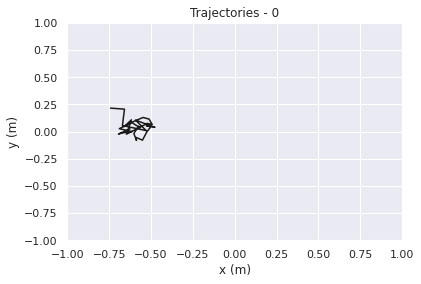

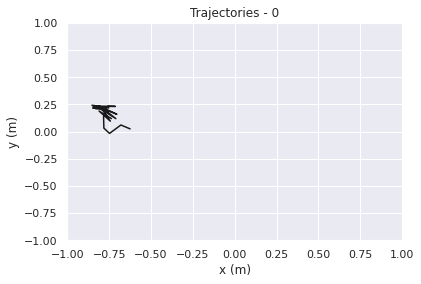

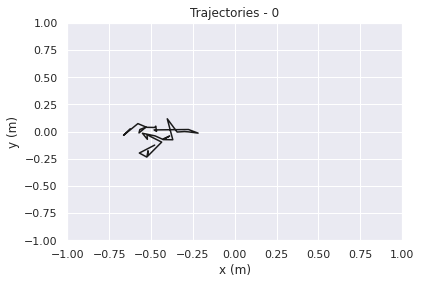

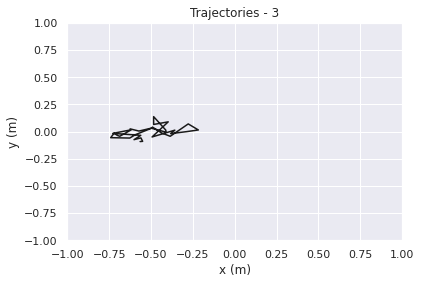

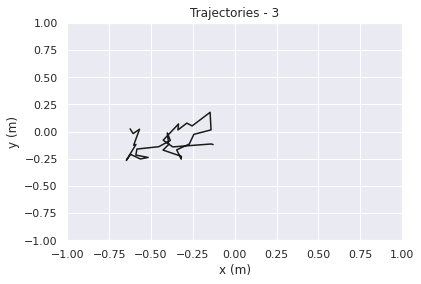

In [84]:

# Fitness file
print(folders)
trajectories = []
for i in range(ROBOTS_NUMBER):
    file_name = 'traj_' + str(i) + '_0'
    list_fitness = miscGeneralMethods.getDataFromFiles(folders, file_name, 0, 0)
    trajectories.append(list_fitness)

for best_robot in range(5):
    robot = int(best_different_robots[len(best_different_robots)-best_robot-1][1])
    rep = int(best_different_robots[len(best_different_robots)-best_robot-1][0])
    
    fig = plt.figure(facecolor='white')
    plt.title('Trajectories - ' + str(rep))
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.ylim([-1.0,1.0])
    plt.xlim([-1.0,1.0])
    
    list_x = []
    list_y = []
    for waypoint in range(len(trajectories[robot][rep])):
        list_x.append(float(trajectories[robot][rep][waypoint][0]))
        list_y.append(float(trajectories[robot][rep][waypoint][1]))
    plt.plot(list_x,list_y,color='k')
    

In [7]:
# Recursive function to get the different lineages
def find_lineage(parent,list_offsprints,temp_lineage,lineages,lst):
    if(parent < len(lst)):
        if(len(list_offsprints[parent]) > 1):
            for i in range(1,len(list_offsprints),1): # Goes through each memeber in the list and finds if child has become a parent
                if(list_offsprints[i][1] == parent):
                    child = int(list_offsprints[i][0])
                    temp_lineage.append(child)
                    lineages = find_lineage(child,list_offsprints,temp_lineage,lineages,lst)
#     print(temp_lineage)
    lineages.append(list(temp_lineage))
    temp_lineage.pop()
    if(parent < len(lst)):
        lst[parent] = 1 # BECAREFUL parent does not match counter
    return lineages
for rep in range(REPLICATES):
    lineages = []
    list_offsprints = var2_fitness_collection[0][rep][:ROBOTS_NUMBER,0:2]
    lst = [0] * len(list_offsprints)
    for i in range(len(list_offsprints)):
        temp_lineage = []
        parent = int(list_offsprints[i][0])
        temp_lineage.append(parent)
        if(parent < len(lst)):
            if(lst[parent] == 0):
                lineages = find_lineage(parent,list_offsprints,temp_lineage,lineages,lst)
    print("Lineages: ", len(lineages))
    print(max(len(x) for x in lineages))

Lineages:  228
17
Lineages:  230
12
Lineages:  229
16
Lineages:  227
17


Scatter...


Text(86.5, 0.49, 'Starting')

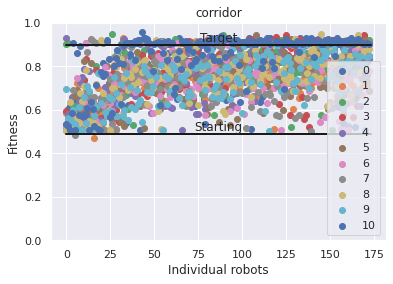

In [59]:
data_array = var2_fitness_collection
var2_parameters = [1]
fitness_target = 0.9
fitness_starting = 0.49
print("Scatter...")
fig = plt.figure(facecolor='white')
plt.title(var1)
plt.xlabel('Individual robots')
plt.ylabel('Fitness')
plt.ylim([0.0,1.0])

for i in range(len(var2_parameters)):
    data_fitness = []
    for j in range(REPLICATES):
        temp_rep = []
        for k in range(ROBOTS_NUMBER):
            temp_rep.append(data_array[i][j][k,3])
        plt.scatter(range(0,ROBOTS_NUMBER,1),temp_rep)
plt.legend(['0','1','2','3','4','5','6','7','8','9','10'])
plt.plot([0,ROBOTS_NUMBER], [fitness_target, fitness_target], 'k', linewidth=2.0)
plt.text(ROBOTS_NUMBER/2,fitness_target,'Target',ha='center',va='bottom')
plt.plot([0,ROBOTS_NUMBER], [fitness_starting, fitness_starting], 'k', linewidth=2.0)
plt.text(ROBOTS_NUMBER/2,fitness_starting,'Starting',ha='center',va='bottom')
plt.savefig(REPOSITORY + var1 + 'scatter_all.png',dpi=200, bbox_inches='tight')
plt.close(fig)